In [1]:
import torch
import torchvision.datasets as datasets

device = "cuda" if torch.cuda.is_available() else "cpu"

%load_ext autoreload
%autoreload 2

In [2]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

train_dataset = mnist_trainset.data[:-10000].reshape(-1, 1, 28, 28) / 255.
eval_dataset = mnist_trainset.data[-10000:].reshape(-1, 1, 28, 28) / 255.

In [3]:
from pythae.models import VAE, VAEConfig
from pythae.trainers import BaseTrainerConfig
from pythae.pipelines.training import TrainingPipeline
from pythae.models.nn.benchmarks.mnist import Encoder_ResNet_VAE_MNIST, Decoder_ResNet_AE_MNIST

In [4]:
config = BaseTrainerConfig(
    output_dir='my_model',
    learning_rate=1e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_epochs=10, # Change this to train the model a bit more
    optimizer_cls="AdamW",
    optimizer_params={"weight_decay": 0.05, "betas": (0.91, 0.99)}
)


model_config = VAEConfig(
    input_dim=(1, 28, 28),
    latent_dim=16
)

model = VAE(
    model_config=model_config,
    encoder=Encoder_ResNet_VAE_MNIST(model_config), 
    decoder=Decoder_ResNet_AE_MNIST(model_config) 
)

In [5]:
pipeline = TrainingPipeline(
    training_config=config,
    model=model
)

In [6]:
pipeline(
    train_data=train_dataset,
    eval_data=eval_dataset
)

Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created my_model folder since did not exist.

Created my_model/VAE_training_2024-05-28_11-39-21. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 10
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.91, 0.99)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0.05
)
Scheduler: None

Successfully launched training !



Training of epoch 1/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 1/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 27.3028
Eval loss: 21.5359
--------------------------------------------------------------------------


Training of epoch 2/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 2/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.9597
Eval loss: 20.3977
--------------------------------------------------------------------------


Training of epoch 3/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 3/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 20.281
Eval loss: 19.9261
--------------------------------------------------------------------------


Training of epoch 4/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 4/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.9049
Eval loss: 19.6782
--------------------------------------------------------------------------


Training of epoch 5/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 5/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.722
Eval loss: 19.4702
--------------------------------------------------------------------------


Training of epoch 6/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 6/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.5537
Eval loss: 19.3081
--------------------------------------------------------------------------


Training of epoch 7/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 7/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.4251
Eval loss: 19.2102
--------------------------------------------------------------------------


Training of epoch 8/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 8/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.3306
Eval loss: 19.1873
--------------------------------------------------------------------------


Training of epoch 9/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 9/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.2401
Eval loss: 19.1769
--------------------------------------------------------------------------


Training of epoch 10/10:   0%|          | 0/782 [00:00<?, ?batch/s]

Eval of epoch 10/10:   0%|          | 0/157 [00:00<?, ?batch/s]

--------------------------------------------------------------------------
Train loss: 19.1332
Eval loss: 18.9923
--------------------------------------------------------------------------
Training ended!
Saved final model in my_model/VAE_training_2024-05-28_11-39-21/final_model


In [7]:
import os
from pythae.models import AutoModel

In [8]:
last_training = sorted(os.listdir('my_model'))[-1]
trained_model = AutoModel.load_from_folder(os.path.join('my_model', last_training, 'final_model'))

In [9]:
from pythae.samplers import NormalSampler

In [10]:
# create normal sampler
normal_samper = NormalSampler(
    model=trained_model
)

In [11]:
# sample
gen_data = normal_samper.sample(
    num_samples=25
)

In [12]:
import matplotlib.pyplot as plt

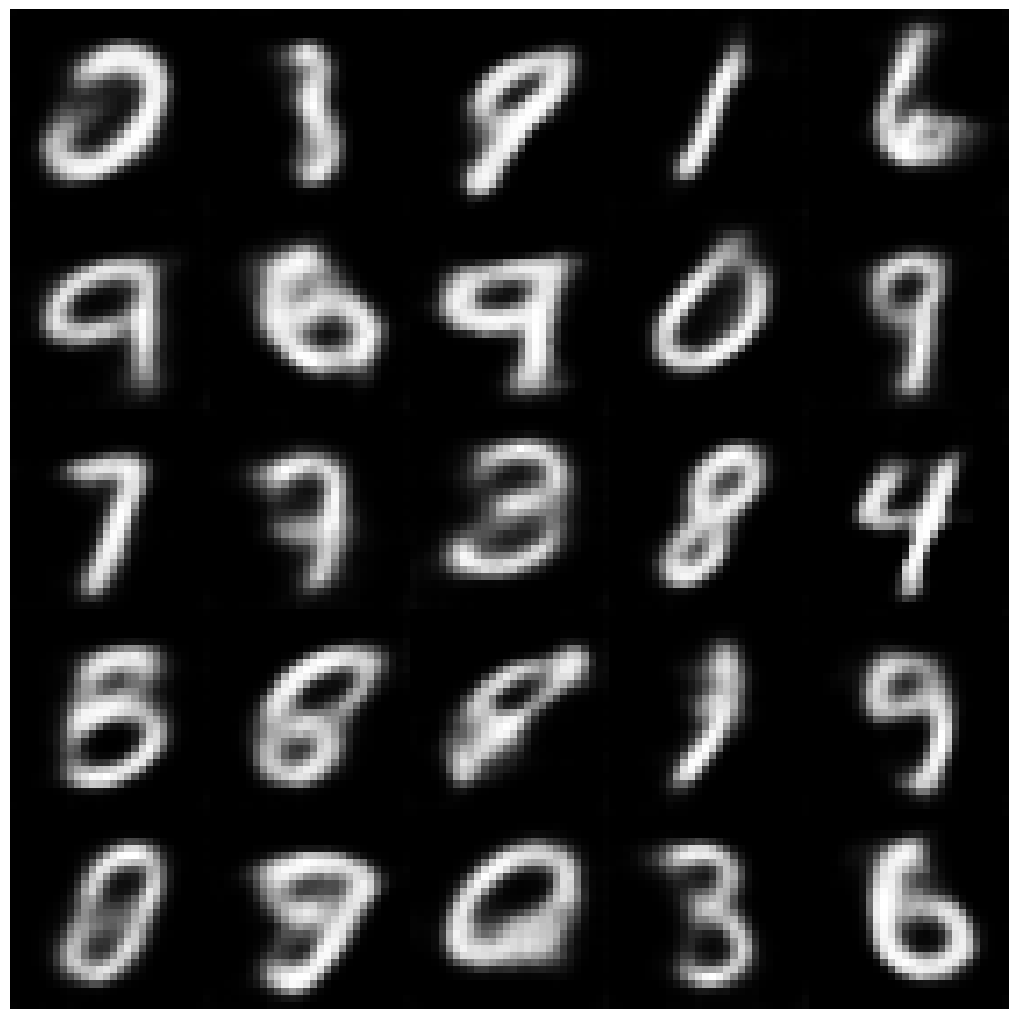

In [13]:
# show results with normal sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

In [14]:
from pythae.samplers import GaussianMixtureSampler, GaussianMixtureSamplerConfig

In [15]:
# set up GMM sampler config
gmm_sampler_config = GaussianMixtureSamplerConfig(
    n_components=10
)

# create gmm sampler
gmm_sampler = GaussianMixtureSampler(
    sampler_config=gmm_sampler_config,
    model=trained_model
)

# fit the sampler
gmm_sampler.fit(train_dataset)

In [16]:
# sample
gen_data = gmm_sampler.sample(
    num_samples=25
)

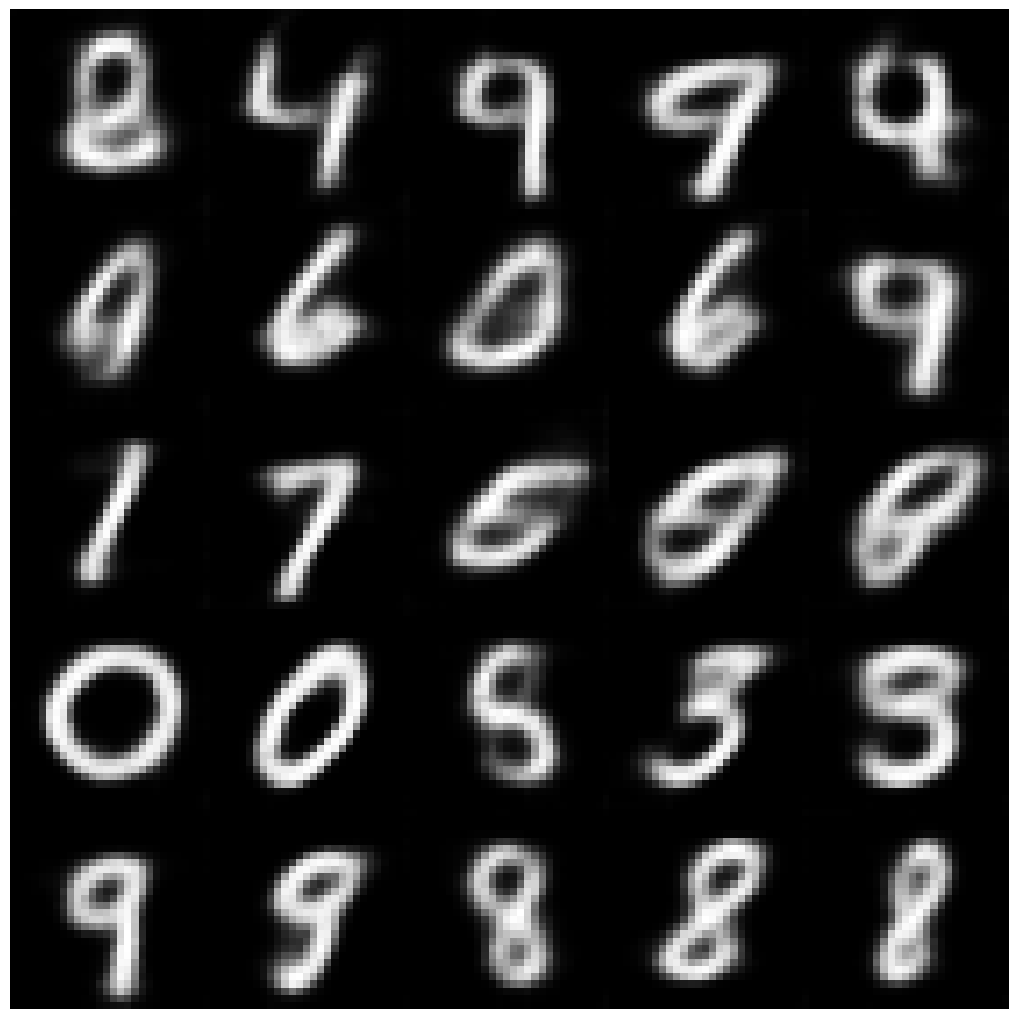

In [17]:
# show results with gmm sampler
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(gen_data[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## ... the other samplers work the same

## Visualizing reconstructions

In [18]:
reconstructions = trained_model.reconstruct(eval_dataset[:25].to(device)).detach().cpu()

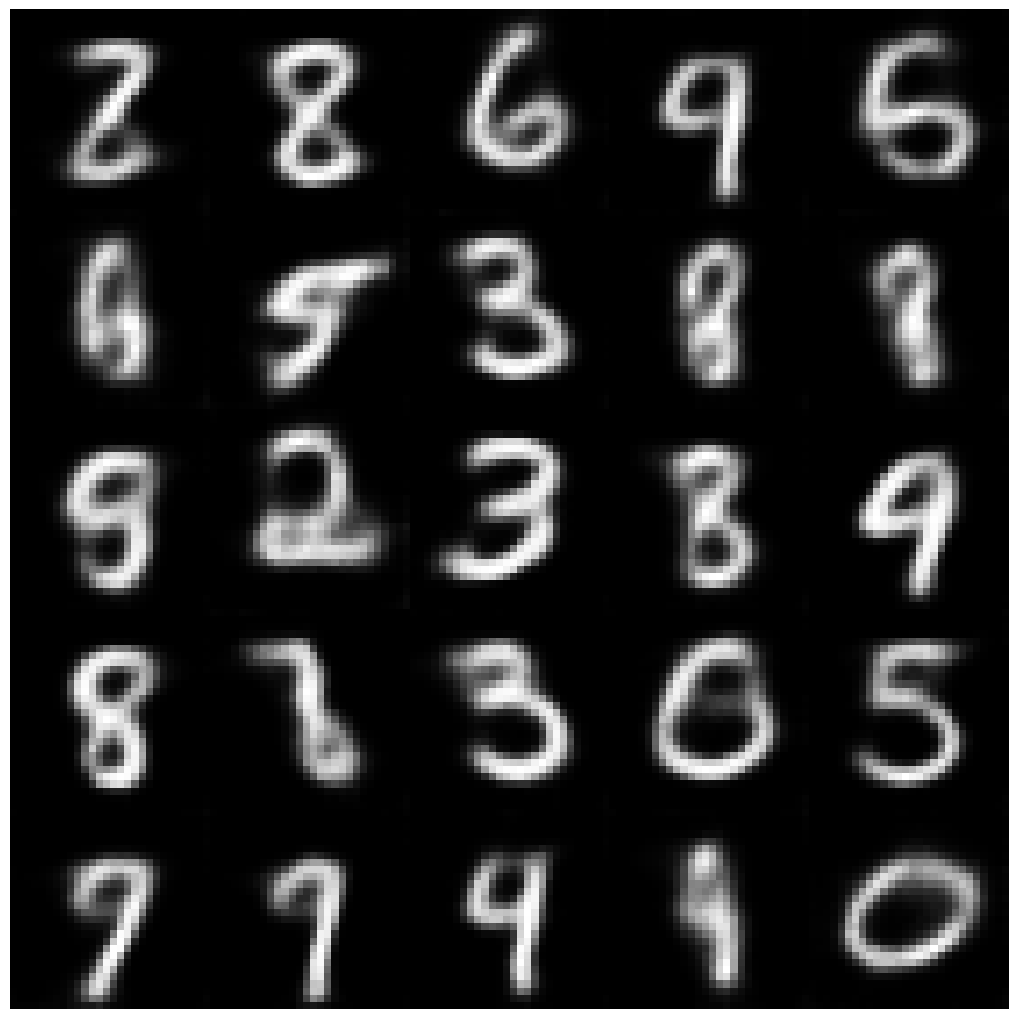

In [19]:
# show reconstructions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(reconstructions[i*5 + j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

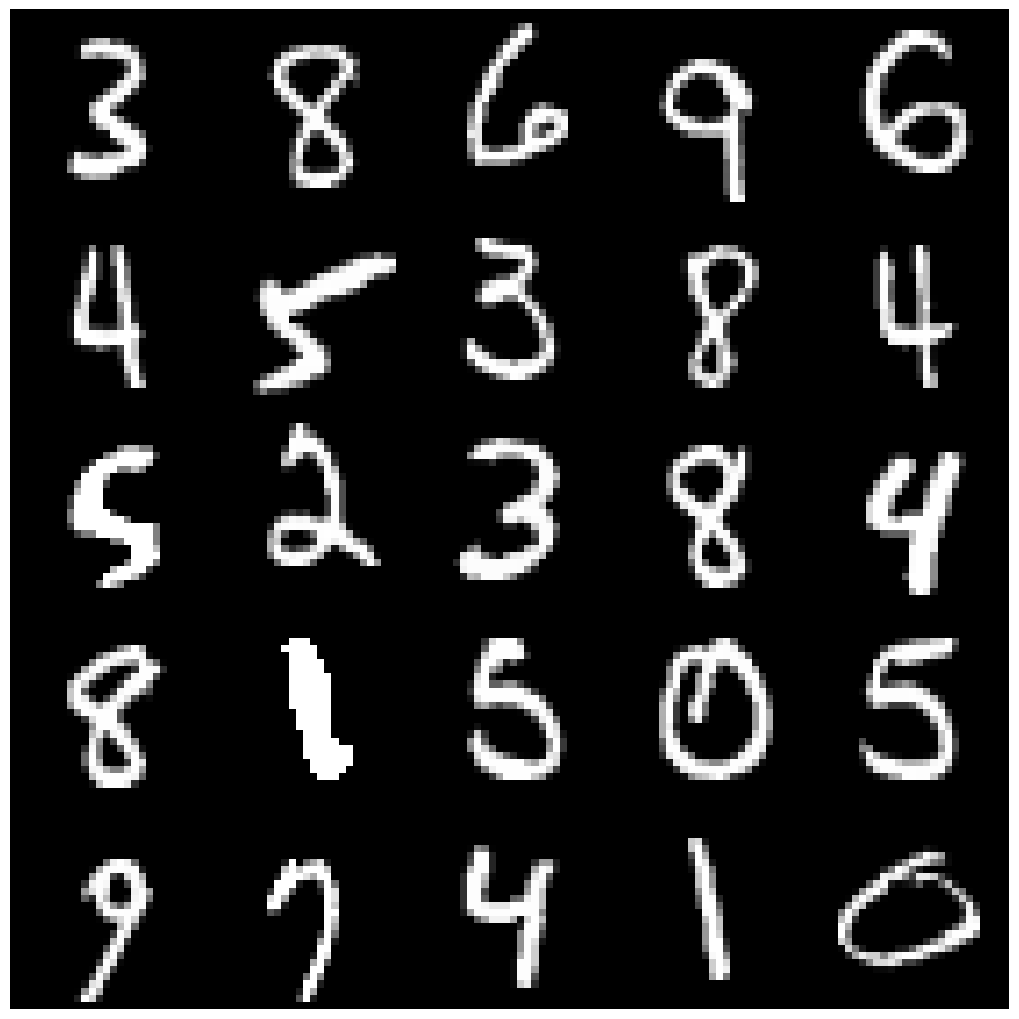

In [20]:
# show the true data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        axes[i][j].imshow(eval_dataset[i*5 +j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)

## Visualizing interpolations

In [21]:
interpolations = trained_model.interpolate(eval_dataset[:5].to(device), eval_dataset[5:10].to(device), granularity=10).detach().cpu()

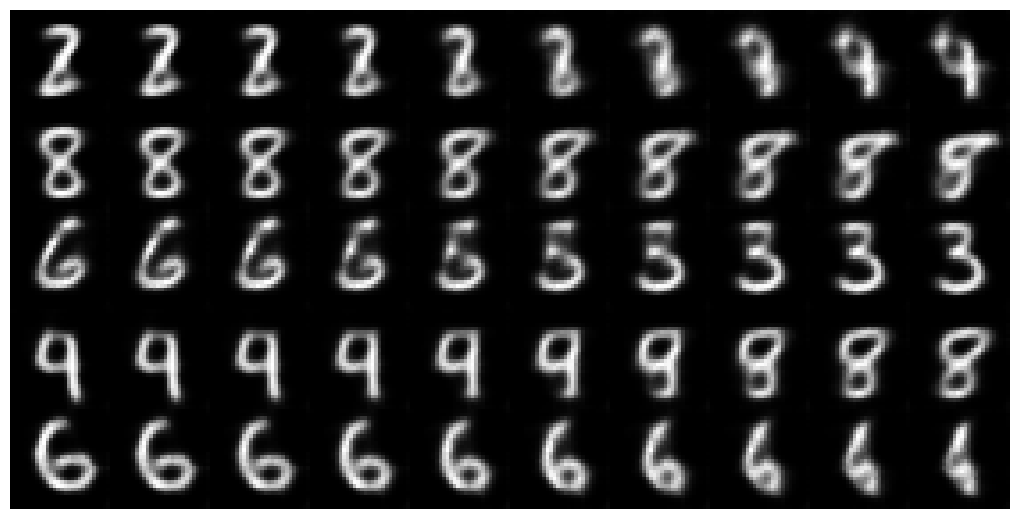

In [22]:
# show interpolations
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        axes[i][j].imshow(interpolations[i, j].cpu().squeeze(0), cmap='gray')
        axes[i][j].axis('off')
plt.tight_layout(pad=0.)